In [14]:
!pip install segmentation-models-pytorch
!pip install onnx-coreml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26302 sha256=446c0ba550fa3ad38994317541d44aa169786f660775551e3a8eb821fab8f155
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [2]:
!pip index versions coremltools
!pip index versions onnx-coreml

coremltools (7.2)
Available versions: 7.2, 7.1, 7.0, 6.3.0, 6.2, 6.1, 6.0, 5.2.0, 5.1.0, 5.0, 4.1, 4.0, 0.8
onnx-coreml (1.3)
Available versions: 1.3, 1.2, 1.1, 1.0, 0.4.0, 0.3.0, 0.2.0, 0.1.1, 0.1.0, 0.0.4, 0.0.3, 0.0.2


In [ ]:
!pip install numpy==1.21.6
!pip install coremltools==4.1
!pip install onnx-coreml==1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.13 requires numpy<2,>=1.24.4, but you have numpy 1.21.6 which is incompatible.
albumentations 1.4.13 requires numpy>=1.24.4, but you have numpy 1.21.6 which is incompatible.
arviz 0.18.0 requires numpy<2.0,>=1.23.0, but you have numpy 1.21.6 which is incompatible.
astropy 6.1.2 requires numpy>=1.23, but you have numpy 1.21.6 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.21.6 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 1.21.6 which is incompatible.
flax 0.8.4 requires numpy>=1.22, but you have numpy 

ERROR: Operation cancelled by user


In [2]:
import torch
import torch.nn as nn
from torchvision import models
from torch.nn.functional import relu
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, Subset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset
import torch.nn.functional as F
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
#model-trainign related pacakges
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
import cv2
from shutil import copyfile

#coreml recomended packages for segmentaiton model conversion:
import urllib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import torch
import torch.nn as nn
import torchvision
import json

from torchvision import transforms
from PIL import Image

# import coremltools as ct
import onnx
# from onnx_coreml import convert

In [3]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[[123,   3,   9],
        [125,   4,  11],
        [127,   4,  11],
        ...,
        [118,   5,  10],
        [116,   3,   8],
        [116,   3,   9]],

       [[125,   4,  11],
        [127,   4,  10],
        [129,   5,  12],
        ...,
        [123,   4,  10],
        [122,   4,   9],
        [119,   3,   9]],

       [[130,   4,  12],
        [130,   5,  13],
        [131,   4,  13],
        ...,
        [127,   4,  12],
        [125,   5,  12],
        [122,   3,   9]],

       ...,

       [[122,   1,   9],
        [128,   3,  12],
        [126,   0,  10],
        ...,
        [ 20,  15,  22],
        [ 20,  17,  24],
        [ 22,  19,  26]],

       [[118,   0,   7],
        [121,   1,   9],
        [127,   1,  11],
        ...,
        [ 22,  17,  24],
        [ 21,  18,  25],
        [ 23,  20,  27]],

       [[116,   0,   7],
        [118,   0,   8],
        [122,   0,   9],
        ...,
        [ 26,  21,  28],
        [ 26,  23,  30],
        [ 29,  26,  34]]], dtype=uint8)
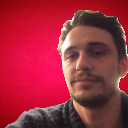

In [4]:
#model setup params (needs to be same so refer to model training file)
ENCODER = 'efficientnet-b7'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = 'cpu' #has to be gpu for downstream.
IMG_SIZE = 128

img_path = '/content/drive/MyDrive/!personalMLProject/portraitSegmentation/PortraitSegModelTestTrace1.png'

test_trace_img = np.array(Image.open(img_path).convert('RGB'), dtype=np.uint8)
test_trace_img

In [5]:
#model init
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=3,
    classes=1,
    activation=ACTIVATION,
)
model.load_state_dict(torch.load('/content/drive/MyDrive/!personalMLProject/portraitSegmentation/portrait_best_model.pth', map_location=torch.device(DEVICE)))
model.to(DEVICE)

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          64, 16, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          16, 64, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePaddi

In [6]:
#preprocess step from smp model's encoder
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [7]:
#transform (totensor), then preprocess:
transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    ToTensorV2(),
])


trace_img_preprocessed = preprocessing_fn(test_trace_img)


(128, 128, 3)


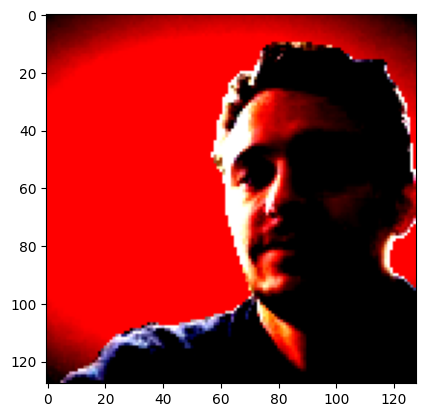

In [8]:
plt.imshow(trace_img_preprocessed)
print(trace_img_preprocessed.shape)

In [9]:
#prediction
input_tensor = torch.from_numpy(trace_img_preprocessed).permute(2, 0, 1).unsqueeze(0).float()
print(input_tensor.shape)
input_tensor = input_tensor.to(DEVICE)
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    torch_predictions = output.squeeze().cpu().numpy()
print (torch_predictions.shape)
print(torch_predictions)

torch.Size([1, 3, 128, 128])
(128, 128)
[[5.1345131e-03 1.6340766e-04 5.7449688e-05 ... 5.1345909e-05
  8.6013199e-05 9.2150515e-04]
 [2.1571112e-04 2.6438715e-06 2.2908910e-06 ... 1.5618001e-06
  6.2287614e-07 1.4911480e-05]
 [3.7943020e-05 1.9631152e-06 3.0597680e-06 ... 8.3463819e-06
  1.3947437e-06 8.1441731e-06]
 ...
 [7.2783580e-05 1.5032928e-06 2.0685826e-08 ... 1.0000000e+00
  1.0000000e+00 9.9999571e-01]
 [1.9790739e-04 2.0496209e-06 6.7317636e-08 ... 1.0000000e+00
  1.0000000e+00 9.9999809e-01]
 [7.4456939e-03 2.3446197e-04 1.4038906e-05 ... 9.9999952e-01
  9.9999821e-01 9.9993896e-01]]


In [10]:
# helper function for data visualization
def visualize_predictions(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

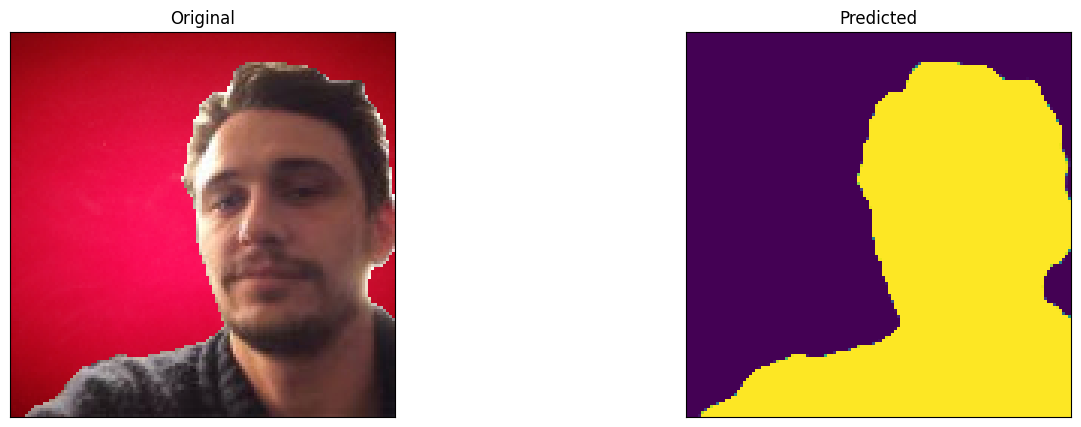

In [11]:
visualize_predictions(
    original=test_trace_img,
    predicted=torch_predictions
)

conversion to coreml

In [12]:
#to onnx
torch.onnx.export(model, input_tensor, "portrait_segmentation_model.onnx",
                  export_params=True,
                  opset_version=11,
                  do_constant_folding=True,
                  input_names=['input'],
                  output_names=['output'],
                  dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}},
                  verbose=True)

/usr/local/lib/python3.10/dist-packages/segmentation_models_pytorch/base/model.py:16: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if h % output_stride != 0 or w % output_stride != 0:
/usr/local/lib/python3.10/dist-packages/torch/onnx/_internal/jit_utils.py:307: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
/usr/local/lib/python3.10/dist-packages/torch/onnx/utils.py:702: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../tor

In [13]:
onnx_model = onnx.load("portrait_segmentation_model.onnx")
onnx.checker.check_model(onnx_model)

Pytorch to CoreML directly

In [14]:
#trace model
model.eval()
trace = torch.jit.trace(model, input_tensor, strict=False)

In [15]:
#trace to conversion
coremlModel = ct.convert(
    trace,
    inputs=[ct.TensorType(name="input", shape=input_tensor.shape)],
)